C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{ Level ความเร็วในการหมุน } = 5.9642857142857135


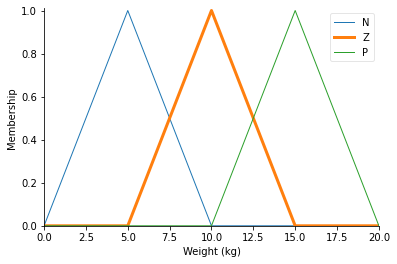

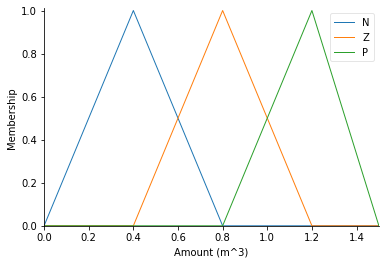

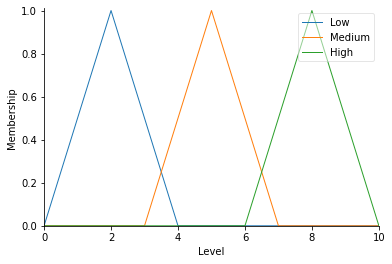

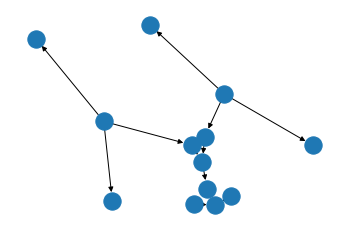

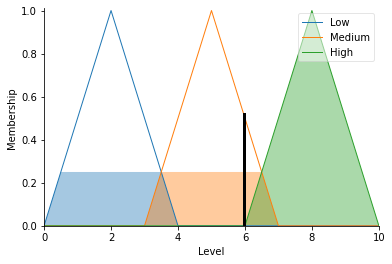

In [1]:
    # จงเขียนโปรแกรมสำหรับช่วยในกํารตัดสินใจด้วยวิธีแบบฟัชซี่ (Fuzzy Control) สำหรับปัญหาการควบคุม
    # แรงการหมุนของมอเตอร์ในเครื่องซักผ้าที่มีทั้งหมด 10 ระดับ โดยเครื่องซักผ้าแบบอัตโนมัติรับข้อมูลน้ำหนัก
    # (รองรับน้ำหนักในช่วง 0 – 20 กิโลกรัม) ของผ้าที่ใส่ลงในถังซัก และ รับข้อมูลปริมาณของผ้า (รองรับปริมาณ
    # 0 – 1.5 ลูกบาศก์เมตร) ที่อยู่ในถังซัก ผลลัพธ์ของกํารตัดสินใจคือ ความเร็วของการหมุนมอเตอร์ที่เหมาะสมต่อ
    # การซักผ้า
    
    import numpy as np
    import skfuzzy as fuzz
    from skfuzzy import control as ctrl
    
    # น้ำหนัก
    Weight = ctrl.Antecedent(np.arange(0, 21, 1), 'Weight (kg)')
    
    # ปริมาณ
    Amount = ctrl.Antecedent(np.arange(0.0, 1.6, 0.1), 'Amount (m^3)')

    # ระดับ
    Level = ctrl.Consequent(np.arange(0, 11, 1), 'Level')
    
    # Graph \Weight\
    Weight['N'] = fuzz.trimf(Weight.universe, [0, 5, 10]) 
    Weight['Z'] = fuzz.trimf(Weight.universe, [5, 10, 15])
    Weight['P'] = fuzz.trimf(Weight.universe, [10, 15, 20])
    
    # Graph \Amount\ 
    Amount['N'] = fuzz.trimf(Amount.universe, [0.0, 0.4, 0.8])
    Amount['Z'] = fuzz.trimf(Amount.universe, [0.4, 0.8, 1.2])
    Amount['P'] = fuzz.trimf(Amount.universe, [0.8, 1.2, 1.5]) 
    
    # Graph \Level\ 
    Level['Low'] = fuzz.trimf(Level.universe, [0, 2, 4])
    Level['Medium'] = fuzz.trimf(Level.universe, [3, 5, 7])
    Level['High'] = fuzz.trimf(Level.universe, [6, 8, 10]) 
    
    # You can see how these look with .view()
    Weight['Z'].view()
    Amount.view()
    Level.view()
    
    # Column N
    rule1 = ctrl.Rule(Weight['N'] | Amount['N'], Level['Low'])
    rule2 = ctrl.Rule(Weight['N'] & Amount['Z'], Level['Medium'])
    rule3 = ctrl.Rule(Weight['N'] & Amount['P'], Level['Medium'])
    
    # Column Z
    rule4 = ctrl.Rule(Weight['Z'] & Amount['N'], Level['Medium'])
    rule5 = ctrl.Rule(Weight['Z'] | Amount['Z'], Level['High'])
    rule6 = ctrl.Rule(Weight['Z'] & Amount['P'], Level['High'])
    
    # Column P
    rule7 = ctrl.Rule(Weight['P'] & Amount['N'], Level['Medium'])
    rule8 = ctrl.Rule(Weight['P'] & Amount['Z'], Level['High'])
    rule9 = ctrl.Rule(Weight['P'] | Amount['P'], Level['High'])
    
    rule1.view()
    Levelping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,
                                       rule4, rule5, rule6,
                                       rule7, rule8, rule9])
    
    Levelping = ctrl.ControlSystemSimulation(Levelping_ctrl)
    
    Levelping.input['Weight (kg)'] = 15
    Levelping.input['Amount (m^3)'] = 0.7
    
    # Crunch the numbers
    Levelping.compute()
    Level.view(sim=Levelping)
    print('{ Level ความเร็วในการหมุน } =',Levelping.output['Level'])

